In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arnavsharma993","key":"28db92dd594806eb7e3d40e2645a131c"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)
/


In [ ]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

unzip:  cannot find or open traffic_sign_dataset/gtsrb-german-traffic-sign.zip, traffic_sign_dataset/gtsrb-german-traffic-sign.zip.zip or traffic_sign_dataset/gtsrb-german-traffic-sign.zip.ZIP.
rm: cannot remove 'traffic_sign_dataset/gtsrb-german-traffic-sign.zip': No such file or directory
rm: cannot remove 'traffic_sign_dataset/Meta.csv': No such file or directory


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

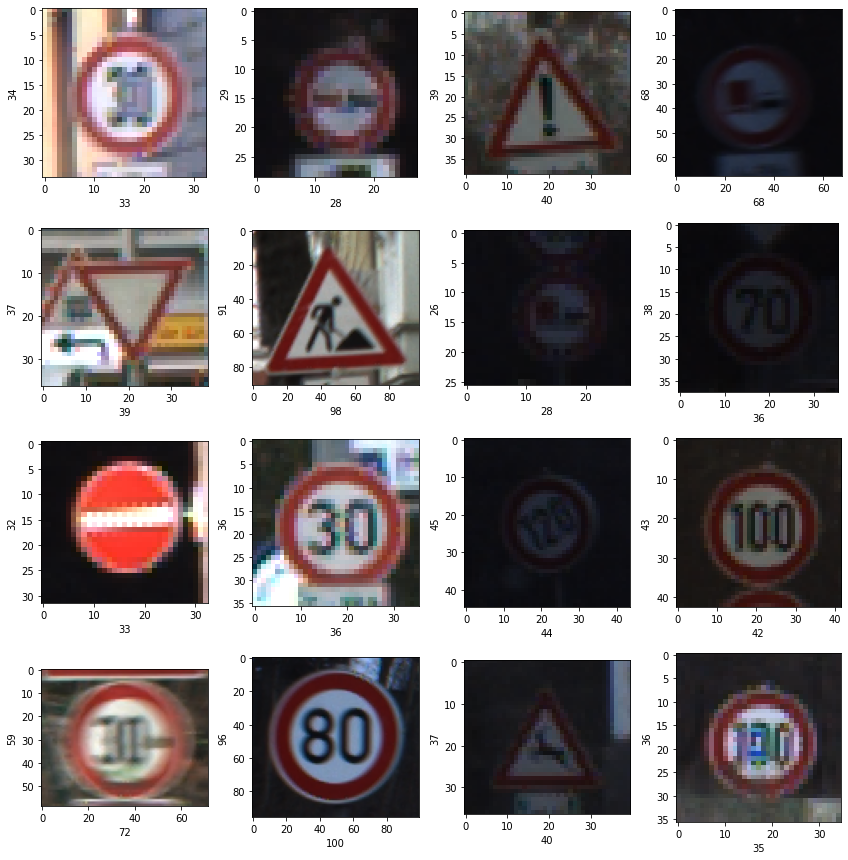

In [ ]:
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10) #width of the image
  plt.ylabel(rand_img.shape[0], fontsize=10) #height of img

In [ ]:
images = []
label_id = []

for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    #listname.append(element to be added)
    images.append(img)
    label_id.append(i)

In [ ]:
images = np.array(images)
images = images/255 #256: 2 raised to the power of 8. 
# 1 Byte = 8 bits.

In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
#To define the test-train split:
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2,random_state=42)

In [ ]:
#Fabrication of CNN: Conv. Layer | Pooling Layer | Fully Connected Layer.
model = Sequential()

#Conv. Layer Code:
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=x_train.shape[1:],activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Pooling layer Code:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Fully Connected Layer Code: Classification Layer Code

model.add(Flatten()) #This process converts your 2-D frame into 1-D. To input the data into next layer.
model.add(Dense(128, activation='relu')) #f(x)=max(0,x)
model.add(Dropout(0.5)) #This is used for the understanding that the N.N needs to contain several neurons.
model.add(Dense(43, activation='softmax'))

#Normalization of the outputs so that, my class. algo can well recognize the data.
#Since, each neuron rep. a class thus, the softmax function's o/p will be the 
# class with the highest prob. values.




# filters = 64 means to process the imgs. as per 64-bit resolution.
# kernel_size = 3x3 or 5x5: In the case of grids, we usually take the 3,3 size and this means that at a time around 9 grids and thse 9 grids will scan at the entire image sets.
# to extract out the images info. in the form of data. 

# Activation Functions: Relu Function - Rectified Linear Unit(ReLU)
# If we have any positive input values for the function then, those values will be unchanged but, if we have value of say 0 or less than that then, it will return us the 0 value.

# +ve: Unchanged/Unaltered.
# 0 or -ve: 0.0.
# Training Datasets. : MLPs,CNNs but not with RNNs.

#Padding: This terms is quiet being used in CNNs.
#Processing End: Kernel Size (3,3)
#Recieving end of the data: Padding.
# The data remains unaltered when it gets transmitted from processing to recieving end.

In [ ]:
# N.N Optimization: Optimizers: SGD Optimizers - Adam Optimization (99%). Loss Function as well.
model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
# Loss Functions: It to manage the bal. in b/w the weights and biases and to also help training any neural network with the best level of accuracy.
# Whenever, we deploy any loss function it demotivates the perf. of a neural network.
# In the backpropagation, we use the SGDs and for them, we deploy the use of loss functions.
# The loss functions work on the backpropagation so as to reform the feedback weights and then, they comprehensively calc. the inputs which will further be given to the N.Ns.

# (1) Mean Squared Error (MSEs): RNNs or any other framework based Networks: The MSE measures the quality of an estimator, it is always nearer to zero but, not less than that. Regression based probs.
# (2) Binary Cross Entropy: Binary Classification problems, we will deploy them and see the outputs under actions.
# (3) Categorical Cross-Entropy: We use these loss function when we tend to deploy any multiclass classification based N.Ns.
# Sparse Cat_ entropy: when your classes are mutually exclusive. When the dataset has multiple classes: soft probabilities (0.1,0.2 etc.)


In [ ]:
model.summary()

# Input image dimensions: 31367, (50, 50, 3)# It roughly has around 31,0000 images. and it has dimensions of say 
# 50 pixels wide and 50 pixels in height splitted in 3 channels.
# From above, my (I = 50.).....(i)
# Kernel = 3x3 my (K=3.).....(ii)
# Stride = 2.....(S=2)......(iii)
# Zero Padding (P=3.).....(iv)
# Depth = 2...(v)

# H.W: 
# Convolution Output dimension = [(I - F +2 *P) / S] +1 x D : (50, 50, 64)

# x_train.shape: (31367, 50, 50, 3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
model.fit(x_train, y_train, epochs =10, batch_size= 128, validation_data =(x_val,y_val), verbose = 2)

Epoch 1/10
246/246 - 209s - loss: 2.5384 - accuracy: 0.3108 - val_loss: 1.4440 - val_accuracy: 0.6500 - 209s/epoch - 849ms/step
Epoch 2/10
246/246 - 204s - loss: 1.2440 - accuracy: 0.6124 - val_loss: 0.5516 - val_accuracy: 0.8650 - 204s/epoch - 829ms/step
Epoch 3/10
246/246 - 204s - loss: 0.7988 - accuracy: 0.7421 - val_loss: 0.3259 - val_accuracy: 0.9314 - 204s/epoch - 831ms/step
Epoch 4/10
246/246 - 195s - loss: 0.6006 - accuracy: 0.8077 - val_loss: 0.2170 - val_accuracy: 0.9566 - 195s/epoch - 794ms/step
Epoch 5/10
246/246 - 202s - loss: 0.5015 - accuracy: 0.8384 - val_loss: 0.1408 - val_accuracy: 0.9685 - 202s/epoch - 823ms/step
Epoch 6/10
246/246 - 200s - loss: 0.4324 - accuracy: 0.8599 - val_loss: 0.1220 - val_accuracy: 0.9793 - 200s/epoch - 815ms/step
Epoch 7/10
246/246 - 216s - loss: 0.3773 - accuracy: 0.8776 - val_loss: 0.1062 - val_accuracy: 0.9786 - 216s/epoch - 877ms/step
Epoch 8/10
246/246 - 195s - loss: 0.3362 - accuracy: 0.8892 - val_loss: 0.0830 - val_accuracy: 0.9824 - 

In [ ]:
x_train.shape

(31367, 50, 50, 3)

In [ ]:
# SGD Optimizers | DL Optimizers: 
# Gradient Descent, SGD, Mini-batch G.D,Adagrad, Adadelta, RMSprop & Adam. 

# Adam: Adaptive Moment Estimation - SGD's extension: Adam optimizer update network weights during training.
# Adam Optimizer works on the N.Ns L.R: it updates the L.R for each network individually.
# When, you use the/call the Adam Optimizer: You basically inherit the features of Adagrad & RMSprop.

In [ ]:
# Adagrad: adaptive gradient descent: This uses the different learning rates for each iteration. 
# This change in learning rates depends upon the difference in the parameters used under training.
# Adv. : You dont need to modify the learning rates manually.
# Demerits: L.R can get decreased during the training phase at a very aggressive rate.
# When your N.N has a low or zero learning rate, the model becomes incapable to acquire more knowledge, and so the accuracy of the model gets compromised. 

In [ ]:
#RMSProp: This works identical to the RPPROP. This is a small exetension in N.N.

#RProp: This Optimizer reolsves the issue of varying gradients.
#In the case of varying gradients, defining a single L.R could be fatal.
#RMSprop is mainly used in min-batch updates. 

In [ ]:
# AdaDelta: 
# The enhance version of Adagrad is Adadelta: Adaptive Learning techniques: 
# Adaptive Learning: Your brain at first gets trained in theory: visual imagery. Practicals happen both in cognitive and in applicative manner.
# (Practical) Use Cases: P.S: A group works(cognitive) and calc. the result. 

# The main Challenge with AdaGrad and RMS is that you need to define the LEarning rates manually at the initial.

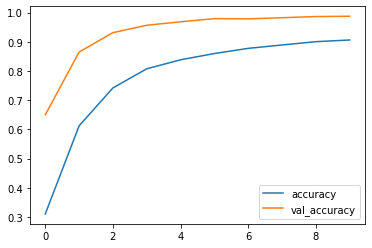

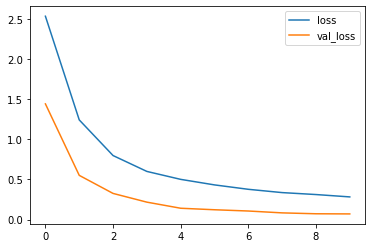

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
from PIL import Image

def scaling(test_images, test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
  
  images = np.array(images)
  images = images/255

  return images

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values

In [ ]:
# Store the Labels:
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

In [ ]:
# Now the results display shall begin:
img = Image.open(test_path + '/00199.png')
img

NameError: ignored

In [ ]:
#Print the label automatically on its own:
print("Original Label : ",all_labels[y_test[199]])

Original Label :  Children crossing


**Neural Network Optimizers**

In [ ]:
# Local vs Global Minima: This concept typically revolves around the Optimizers 
# and the loss functions.

# Across the Convex functions, my G.D works pretty well

#1. Convex vs Non-Convex(Concave) Functions: The generic approach as per the experience 
# is from Top to Down Approach and in this,

# any convex function it should atleast has one minima.

# any non-convex can have multiple minimas.

# in b/w local & global minimas: 

In [ ]:
# Gradient Descents: 

# We have used the N.N optimizers in our code so, 
# that is the usual point of application of such concepts.

# 1. Batch Gradient Descent: - instead of the entire training set taking one at a 
# time, the N.N Optimizers get deployed across every batch. 

# This consumes a lot of training time
# Firstly, it calculates the Gradient "G" of the function f(w), using all data
# points which are avaiable in the entire training sets.

# 2. Stochastic Gradient Descent: 

# Stochastic: having a random prob. dist. or pattern that can be 
# analyzed but cannot be predicted.

#As the process is stochastic in nature thus, it takes a very less time as compared to batch G.D.


# In stoachastic, typically the use of a Random Variable is done. (random_state=42)

# It basically refers to the system that is connected with random probability.


#They both basically update the weights values.


In [ ]:
# Mini Batch Gradient Descent: This is a combination of SGD and Batch GD.

# It splits the entire training set into small batches and then performs the updates on them.

# This is far most the ultra productive and very robust type of G.D.

In [ ]:
#Now, when we design any n.N and then deploy the relevant N.N Optimizer, loss functions & optimizers: 
#they basically re-train the weights (w- values) 
#and along the same, they too affect the N.Ns L.R: this concept typically deals with the time.

#Momentum: Mechnial Term (M and Velocity): It accelarates the convergence towards the relevant direction and accordingly 
# it reduces the fluctuation to the relevant direction.

#Nesterov Momentum: This momentum based technique is coined a the first by Nesterov and then it helps to estimate the
# future steps and to update the parameters accordingly.  Look ahead method.

 **Neural Network Architectures**

In [ ]:
# Activation Functions: 

# Linear Activation: y = mx+c.

# Non-Linear Activation Functions:

# Sigmoid Functions: "S" shaped curve. [0,1]
# This can also be used for binary classifications as well. (0.5)
#If the o/p of any sigmoid function is >= 0.5 then, it is considered as a positive class or el the negative class.

# Hyperbolic Tangent Function: This is the ratio between hyperbolic sine and cosine functions. The Output of this function
# always lies in b/w -1 to 1. 
# Hidden layers of our neural network.

In [ ]:
# Vanishing Gradient Problem: 

# Mountains can have infinite gradients but, a plain slope of land has typically no gradient.

# If i have no gradient across my loss functions then, there is no point to deploy the optimizers.

#if there is no point to deploy my optimizers then, there will be no L.R of your N.N : Obsolete/Abandoned N.N

#This issue comes up when you train your hidden layers of the neural networks.

# When we train any A.N.N: gradient based learning methods and with the help of backprop. 
# N.N weights recieves an short update which is proportional to the partial derivative of the error function.

# Sigmoid & hyperbolic tangent: since because the effective gradients are very small, this will prevent the change of values in wieghts.

# my n.n can stop learning in future epochs.

In [ ]:
#Leaky Relu Functions: It is based on ReLu but, it can also take negative values and then, it can return o/ps 
# other than zero for negative inputs.